<a href="https://colab.research.google.com/github/marlin2023/d2l/blob/main/08%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92_%E4%BB%8E0%E5%BC%80%E5%A7%8B%E5%AE%9E%E7%8E%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 08线性回归-从0开始实现
https://www.bilibili.com/video/BV1PX4y1g7KC?p=3&vd_source=53058ee25bac3920e7473970a2362146


In [ ]:
# 安装 d2l 库
!pip install d2l


In [1]:
import random
import torch
from d2l import torch as d2l


In [2]:
def synthetic_data(w, b, num_examples):
  # 生成y = Xw + b + 噪声
  X = torch.normal(0, 1, (num_examples, len(w)))
  y = torch.matmul(X, w) + b
  y += torch.normal(0, 0.01, y.shape)
  return X, y.reshape(-1, 1)

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

features 中的每一行都包含一个二维数据样本，labels中的每一行都包含一维标签值（一个标量）



In [3]:
print ('features:', features[0], '\nlabel:', labels[0])


features: tensor([0.4451, 0.0508]) 
label: tensor([4.9378])


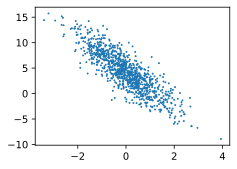

In [4]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(),
                labels.detach().numpy(), 1)

第一个data_iter 函数，该函数接收批量大小、特征矩阵和标量向量作为输入，生成大小为batch_size 的小批量


In [5]:
def data_iter(batch_size, features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  # 样本随机读取
  random.shuffle(indices)

  for i in range(0, num_examples, batch_size):
    batch_indices = torch.tensor(
          indices[i:min(i+batch_size, num_examples)])
    yield features[batch_indices], labels[batch_indices]

batch_size = 10
for X, y in data_iter(batch_size, features, labels):
  print(X, '\n', y)
  break

tensor([[ 0.2268,  0.4254],
        [ 0.8972, -1.9924],
        [-0.8808, -0.1695],
        [-0.3131, -1.4476],
        [-0.2467,  0.3994],
        [ 0.3190, -1.0437],
        [ 1.4354, -1.0940],
        [-1.4696,  0.7441],
        [-1.0966, -1.0416],
        [-0.3144,  0.7547]]) 
 tensor([[ 3.1965],
        [12.7572],
        [ 3.0261],
        [ 8.4926],
        [ 2.3407],
        [ 8.3844],
        [10.7864],
        [-1.2769],
        [ 5.5425],
        [ 1.0009]])


我们数据准备好了，接下来就是定义模型参数


In [10]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)


# 定义模型

In [6]:
def linreg(X, w, b):
  # 线性回归函数
  return torch.matmul(X, w) + b

# 定义损失函数

In [7]:
def squared_loss(y_hat, y):
    # 均方损失
    return (y_hat - y.reshape(y_hat.shape))**2 /2

# 定义优化方法

In [8]:
def sgd(params, lr, batch_size):
    # params 包括了w和b
    # 小批量随机梯度下降
    with torch.no_grad():
      for param in params:
          param -= lr * param.grad / batch_size
          param.grad.zero_()  # 手动把梯度设置为0


# 训练过程


In [11]:
# 超参数
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X 和 y的小批量损失
        l.sum().backward()  # 求和之后算梯度
        sgd([w, b], lr, batch_size)

    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch +1}, loss {float(train_l.mean()):f}')


epoch 1, loss 0.032908
epoch 2, loss 0.000120
epoch 3, loss 0.000050
